# Data from Frankefunction

In [42]:
from functions import *
from main import * 

In [43]:
x,y,z = generate_data()

Defining variables next: 

In [44]:
degrees = np.linspace(1,10,10)

bias = np.zeros(len(degrees))
variance = np.zeros(len(degrees))

test_MSE = np.zeros(len(degrees))
test_R2 = np.zeros(len(degrees))

train_MSE = np.zeros(len(degrees))
train_R2 = np.zeros(len(degrees))

Performing 5 fold cross-validation with our 'OLS'.

In [45]:
k = 5 #cross fold
for polygrad in degrees:

    j = int(polygrad) - 1
    scores = bias_variance(x,y,z,polygrad,k, regressiontype='OLS')

    train_MSE[j] = scores[0]
    train_R2[j] = scores[1]

    test_MSE[j] = scores[2]
    bias[j] = scores[3]
    variance[j] = scores[4]
    if (test_MSE[j]>= (bias[j]+variance[j])):
        print ("Correct: ")
    else :
        print ("MSE is not equal to variance + bias^2 by : {}".format(test_MSE[j]-(bias[j]+variance[j])))
    print('{} >= {} + {} = {}'.format(test_MSE[j],bias[j], variance[j], bias[j]+variance[j]))
    print (" ")

MSE is not equal to variance + bias^2 by : -3.469446951953614e-18
0.024807629495005222 >= 0.024769312037769116 + 3.831745723610845e-05 = 0.024807629495005225
 
MSE is not equal to variance + bias^2 by : -6.938893903907228e-18
0.023235455666732498 >= 0.023137558093504734 + 9.789757322776864e-05 = 0.023235455666732505
 
Correct: 
0.008446604692230181 >= 0.008389931286814268 + 5.667340541591199e-05 = 0.008446604692230181
 
MSE is not equal to variance + bias^2 by : -8.673617379884035e-19
0.005435896293314106 >= 0.005347285918957659 + 8.861037435644749e-05 = 0.0054358962933141065
 
MSE is not equal to variance + bias^2 by : -4.336808689942018e-19
0.002129614303384204 >= 0.002078559493412386 + 5.105480997181879e-05 = 0.0021296143033842046
 
MSE is not equal to variance + bias^2 by : -4.336808689942018e-19
0.0012660596888264448 >= 0.0011405284162271066 + 0.00012553127259933857 = 0.0012660596888264453
 
MSE is not equal to variance + bias^2 by : -1.0842021724855044e-19
0.0006804652907720715 >

Here we would like to compare our test and train MSE, and also look at our variance and bias trade-off as a function. 

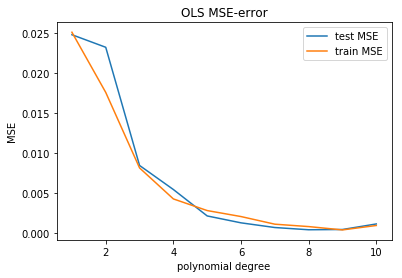

In [46]:
plt.plot(degrees,test_MSE)
plt.plot(degrees,train_MSE)
plt.xlabel("polynomial degree")
plt.ylabel("MSE")
plt.title("OLS MSE-error")
plt.legend(["test MSE","train MSE"])

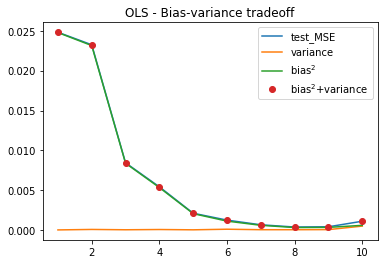

In [47]:
plt.plot(degrees,test_MSE)
plt.plot(degrees,variance)
plt.plot(degrees,bias)
plt.title("OLS - Bias-variance tradeoff")
plt.plot(degrees,variance+bias,'o')
plt.legend(["test_MSE","variance", "bias$^2$","bias$^2$+variance"])    
plt.show()

# Ridge regression

We will do much of the same analysis as we did above, but first we need to check which hyperparameter lambda is best. 

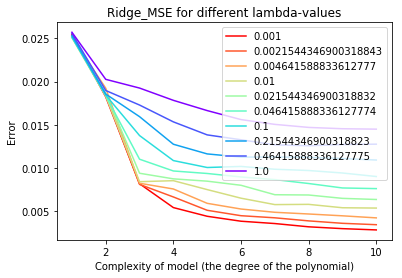

In [48]:
    
nlambdas = 10
lambdas = np.logspace(-3,0,nlambdas)
    
color=iter(cm.rainbow(np.linspace(1,0,nlambdas)))
    
for lamb in lambdas:  
        test2_MSE = Different_Lambdas(x, y, z, degrees, k, lamb, regressiontype='Ridge')
        
    
        c = next(color)
        plt.plot(degrees,test2_MSE, c=c)
        plt.legend(lambdas)
        plt.xlabel("Complexity of model (the degree of the polynomial)")
        plt.ylabel("Error")
        plt.title("Ridge_MSE for different lambda-values")
plt.show()

As we can see, the lower the $\lambda$, the better. Thus, we will use $10^{-4}$ as our $\lambda$.

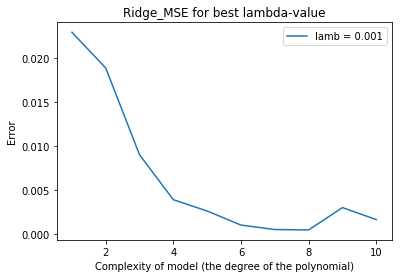

In [49]:
lamb = 1e-5

test_MSE_Ridge, Bias, Variance = Best_Lambda(x, y, z, degrees, k, lamb, regressiontype='Ridge')

plt.plot(degrees,test_MSE_Ridge)
plt.legend(["lamb = 0.001"])
plt.xlabel("Complexity of model (the degree of the polynomial)")
plt.ylabel("Error")
plt.title("Ridge_MSE for best lambda-value")
plt.show()

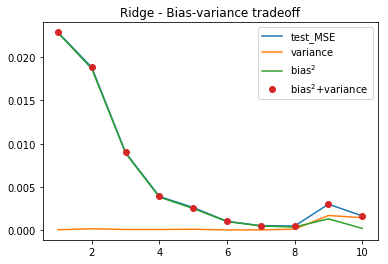

In [50]:
plt.plot(degrees,test_MSE_Ridge)
plt.plot(degrees,Variance)
plt.plot(degrees,Bias)
plt.title("Ridge - Bias-variance tradeoff")
plt.plot(degrees,Variance+Bias,'o')
plt.legend(["test_MSE","variance", "bias$^2$","bias$^2$+variance"])    
plt.show()

# LASSO regression

100%|██████████| 10/10 [00:03<00:00,  2.77it/s]


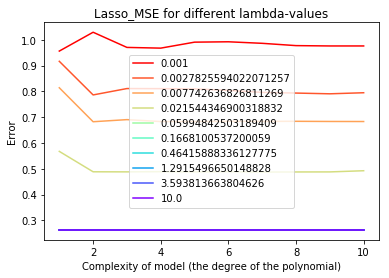

In [51]:
color=iter(cm.rainbow(np.linspace(1,0,nlambdas)))
lambdas = np.logspace(-3,1,nlambdas)

for lamb in tqdm(lambdas):

        test_MSE_LASSO = Different_Lambdas(x, y, z, degrees, k, lamb, regressiontype='Lasso')
        
        c = next(color)
        plt.plot(degrees,test_MSE_LASSO, c=c)
        plt.legend(lambdas)
        plt.xlabel("Complexity of model (the degree of the polynomial)")
        plt.ylabel("Error")
        plt.title("Lasso_MSE for different lambda-values")
plt.show()

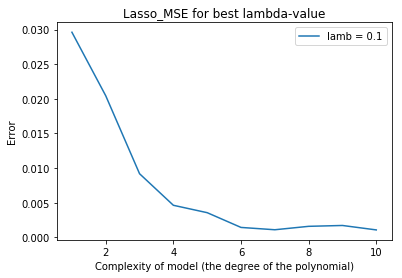

In [52]:
    lamb = 0.1

    test_MSE_LASSO, Bias, Variance = Best_Lambda(x, y, z, degrees, k, lamb, regressiontype='Lasso')

    plt.plot(degrees,test_MSE_LASSO)
    plt.legend(["lamb = 0.1"])
    plt.title("Lasso_MSE for best lambda-value")
    plt.xlabel("Complexity of model (the degree of the polynomial)")
    plt.ylabel("Error")
    plt.show()


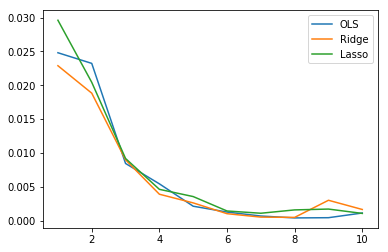

In [57]:
plt.plot(degrees,test_MSE)
plt.plot(degrees,test_MSE_Ridge)
plt.plot(degrees,test_MSE_LASSO)
plt.legend(["OLS","Ridge","Lasso"])

In [54]:
#x,y,z = terrain_data()